# Análise de dados: sobre vendas de eletrônicos em varejo em 2019:
#### A base de dados usada foi retirada do site Kaggle

## Parte 1: Preparação dos dados

### Importando bibliotecas:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from itertools import combinations
from collections import  Counter
import seaborn as sns

### Definindo as variáveis: 

In [44]:
files = [file for file in os.listdir(r'C:\Users\Thomas\Notebooks\Planilhas\Sales')]
dfs = []

for file in files:
    dfs.append(pd.read_csv('C:\\Users\\Thomas\\Notebooks\\Planilhas\\Sales\\' + file ))

sales_df = pd.concat(dfs,axis=0)

### Tratamento da base de dados:

In [45]:
sales_df[sales_df.isna().any(axis=1)]
sales_df = sales_df.dropna(axis=0,how='all')

sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df = sales_df.loc[sales_df['Month']!='Or']

sales_df['Month'] = sales_df['Month'].astype(int)

sales_df['Price Each'] = sales_df['Price Each'].astype(float)

sales_df['Quantity Ordered'] = sales_df['Quantity Ordered'].astype(int)

## Passo 2: Elaborando analises: 

### 1- Qual mês tem mais vendas ?

In [46]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
month_sales = sales_df[['Month','Sales']].groupby('Month').sum()

In [48]:
month_sales = month_sales.sort_values('Sales',ascending=False)
month_sales.reset_index(inplace=True)

### R: O mês com mais alto número de vendas é Dezembro com 4.613.443,34 dólares em vendas.

### Visualização de dados:

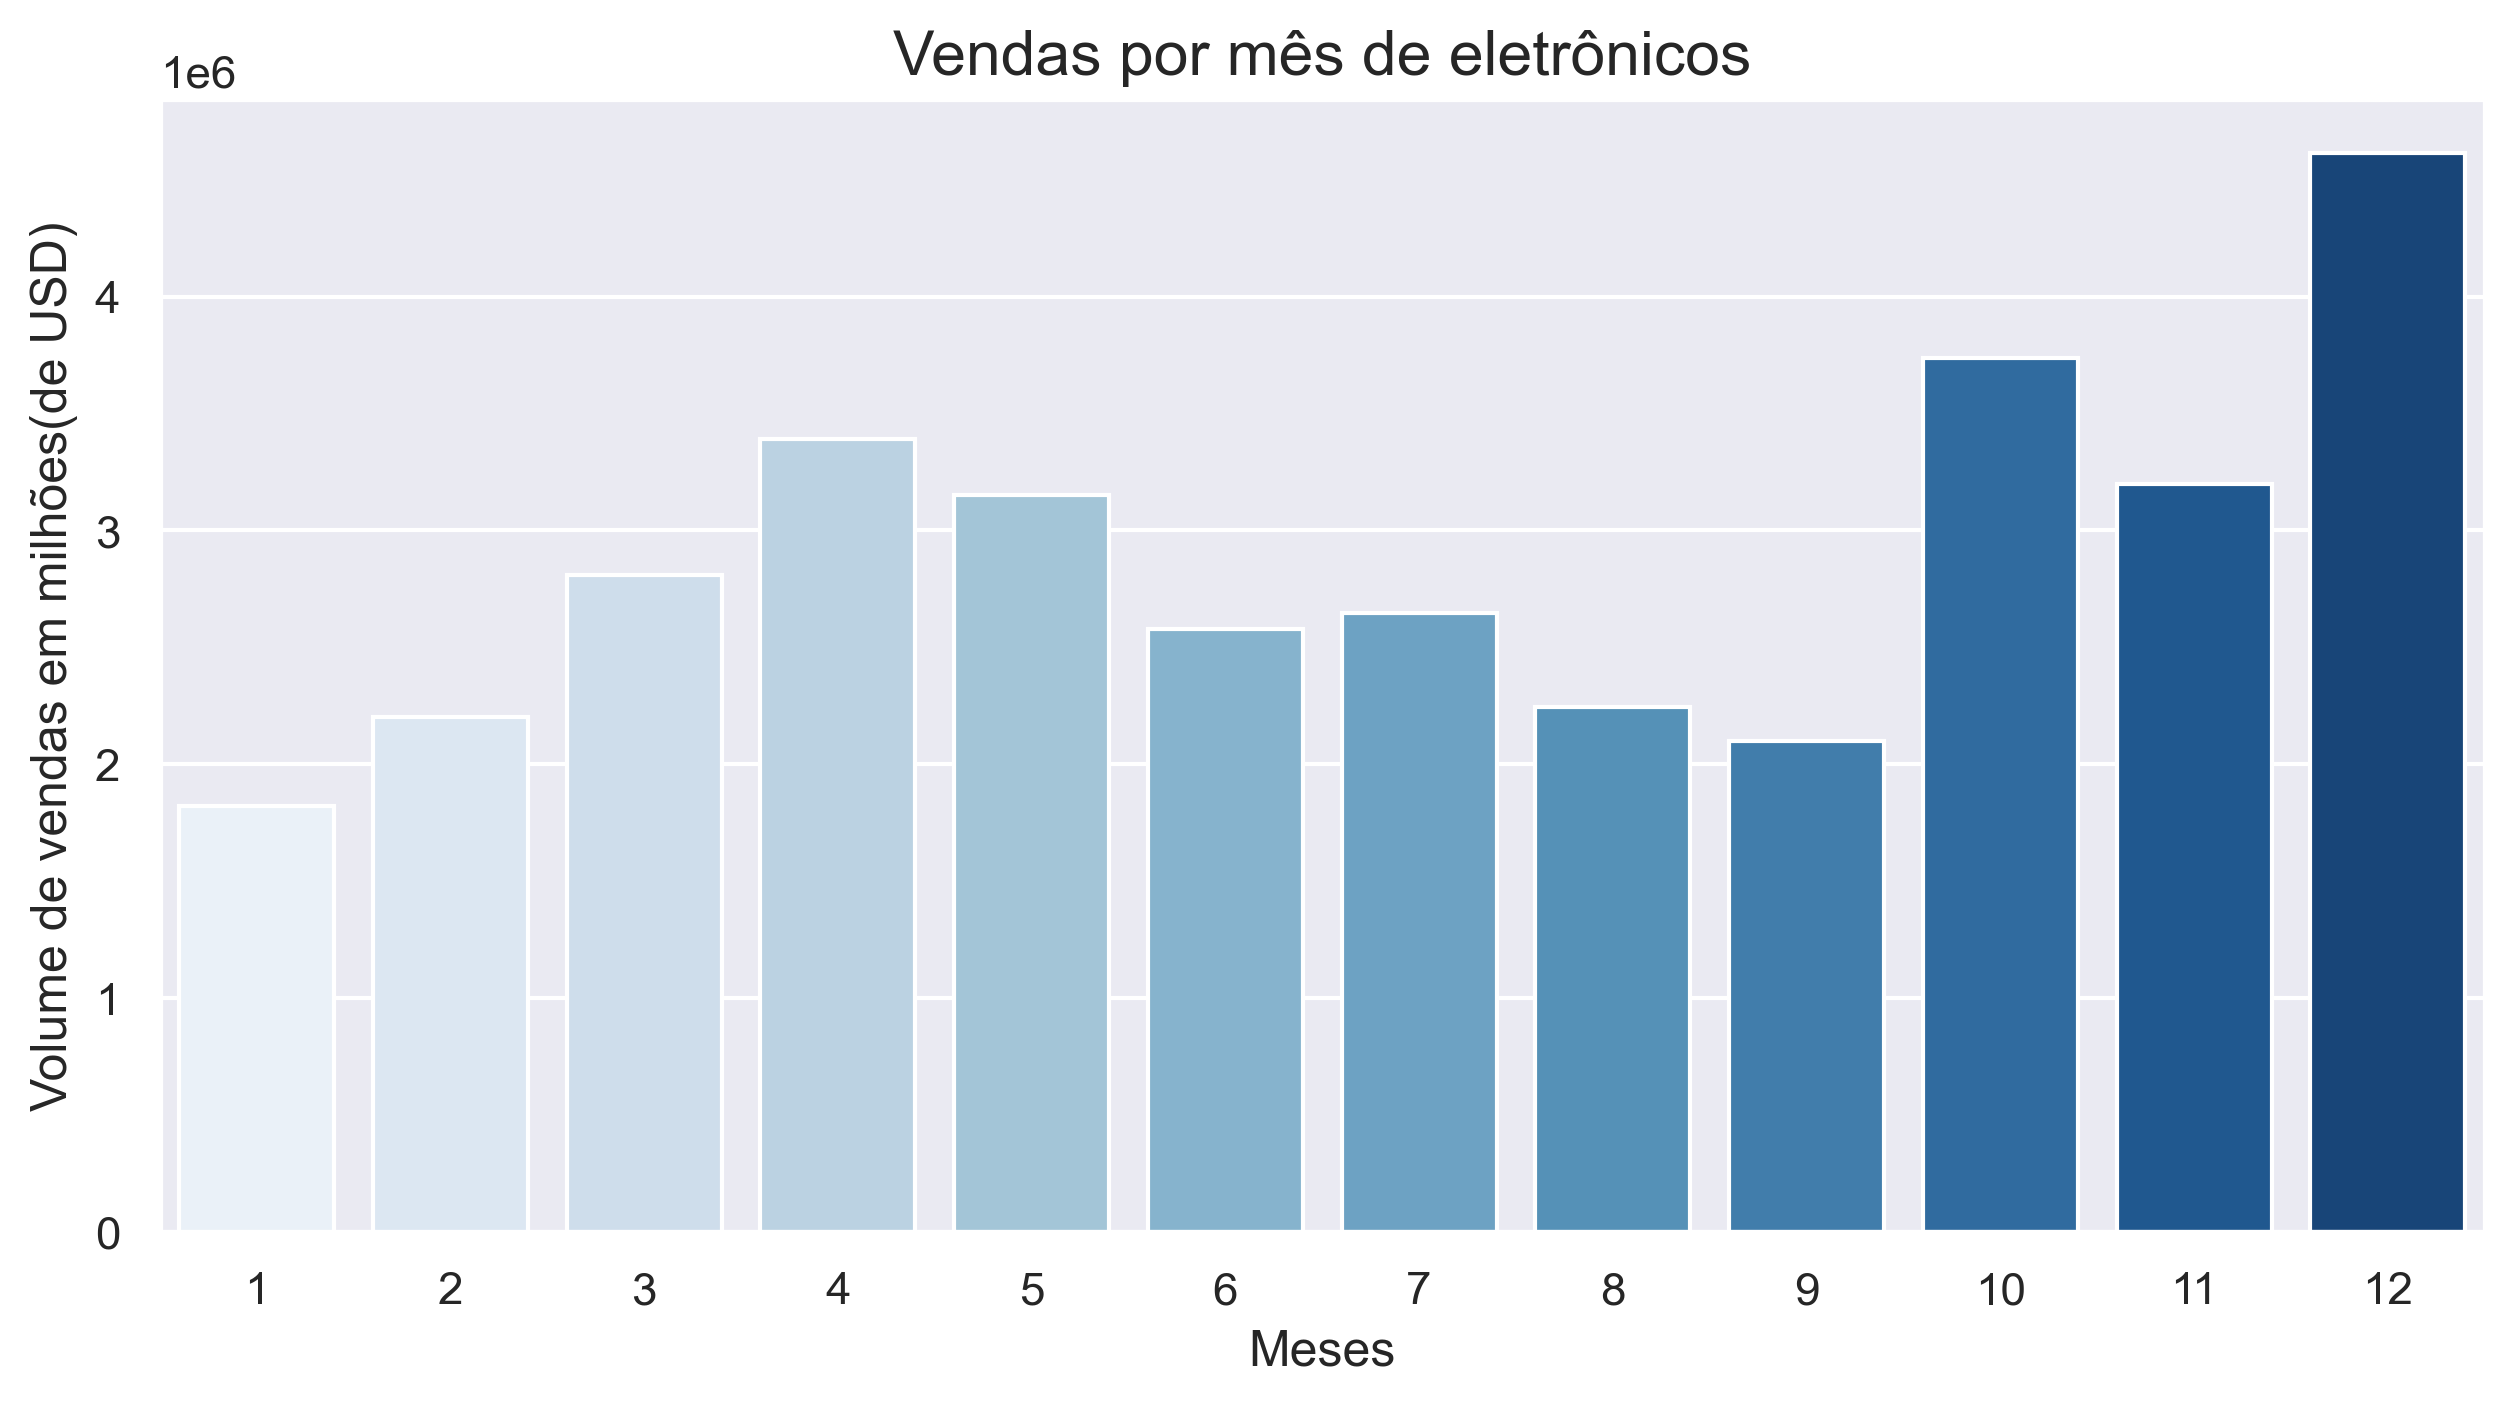

In [61]:
plt.figure(figsize=(10,5),dpi=300)
sns.barplot(data=month_sales,x='Month',y='Sales',palette='Blues')
plt.xlabel('Meses',fontsize=12)
plt.ylabel('Volume de vendas em milhões(de USD)',fontsize=12)
plt.title('Vendas por mês de eletrônicos',fontsize=15)
plt.show()

### 2- Qual a cidade com maior volume de vendas ?

In [9]:
sales_df['Cities'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + '(' + x.split(',')[2].split(' ')[1] + ')')

In [10]:
cities_df = sales_df[['Sales','Cities']].groupby('Cities').sum()
cities_df = cities_df.sort_values('Sales',ascending=False)
display(cities_df)

,Sales
Cities,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


###  R: A cidade com maior total de vendas ao longo do ano foi São Francisco com 8.262.203,91 de dólares em vendas.

### Visualização de dados:

Text(0.5, 1.0, 'Sales by City')

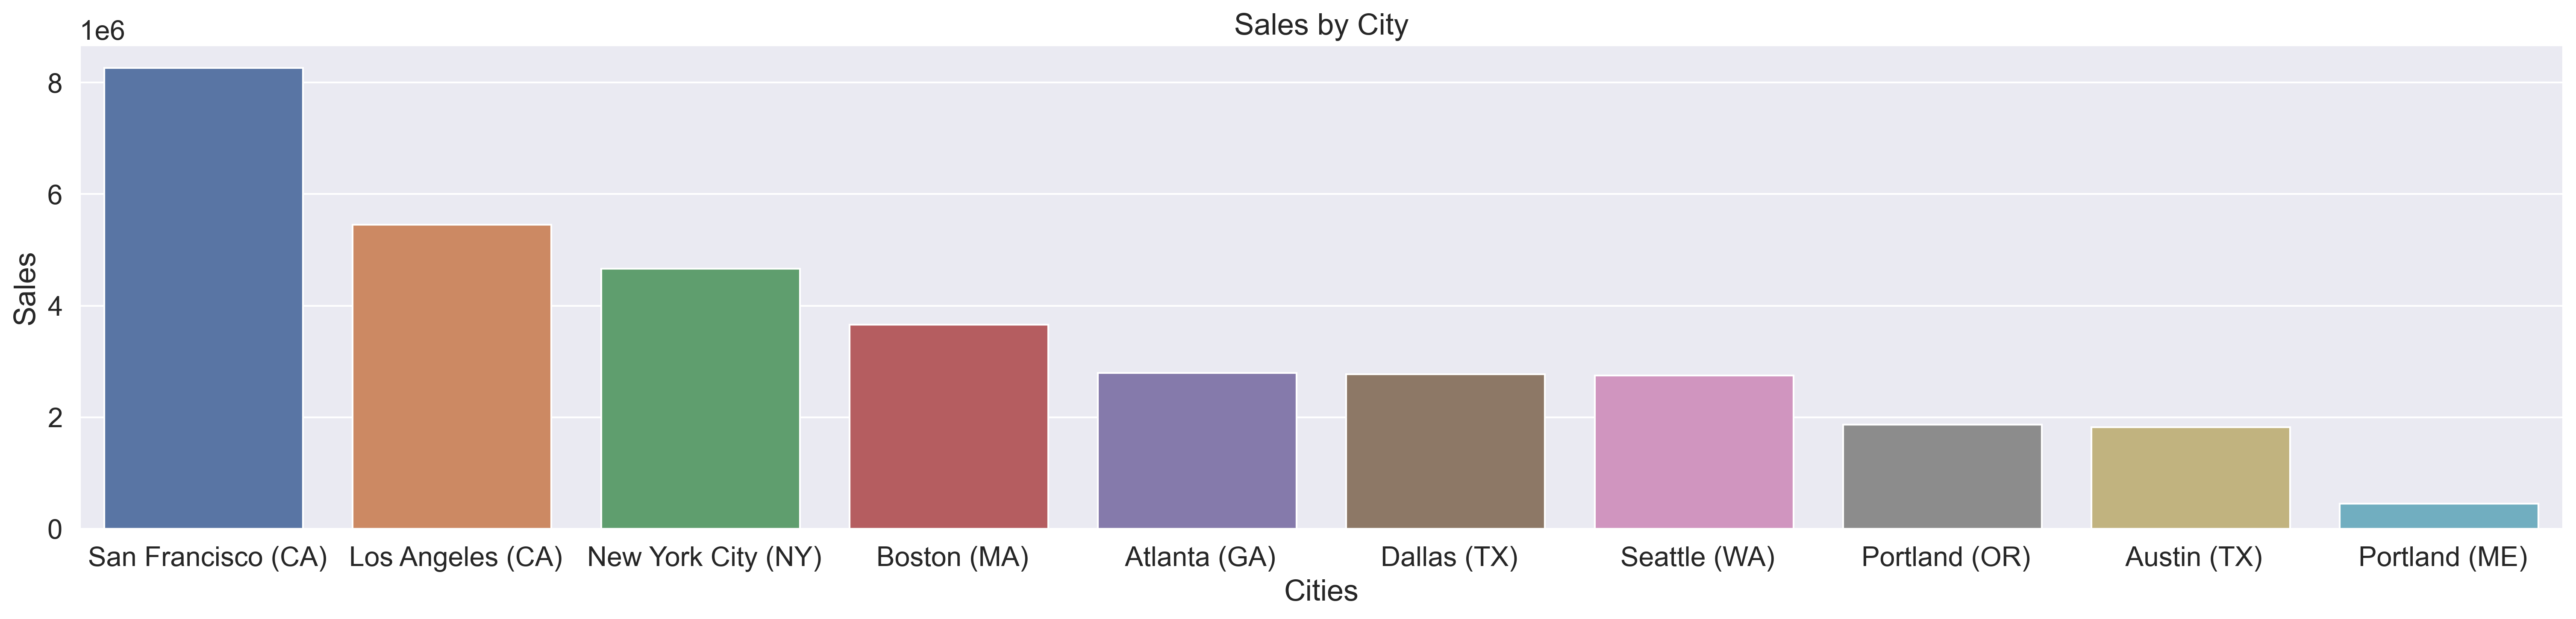

In [78]:
plt.figure(figsize=(25,5),dpi=300)
sns.set(font_scale=1.4)
sns.barplot(data=cities_df,x=cities_df.index,y=cities_df['Sales'])
plt.title('Sales by City')


###  3- Que horas devemos exibir anúncios de propagandas para aumentar a probabilidade de vendas ?

In [12]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [13]:
sales_df['Hour'] = sales_df['Order Date'].dt.hour
sales_df['Minute'] = sales_df['Order Date'].dt.minute
horario = sales_df[['Hour','Quantity Ordered']].groupby('Hour').sum()
horario = horario.sort_values(['Hour'])

In [14]:
horario

,Quantity Ordered
Hour,
0,4428
1,2619
2,1398
3,928
4,937
5,1493
6,2810
7,4556
8,7002


### R: Os melhores horários para exibir uma propaganda são em torno das 19h e das 12h.

### Visualização de dados:

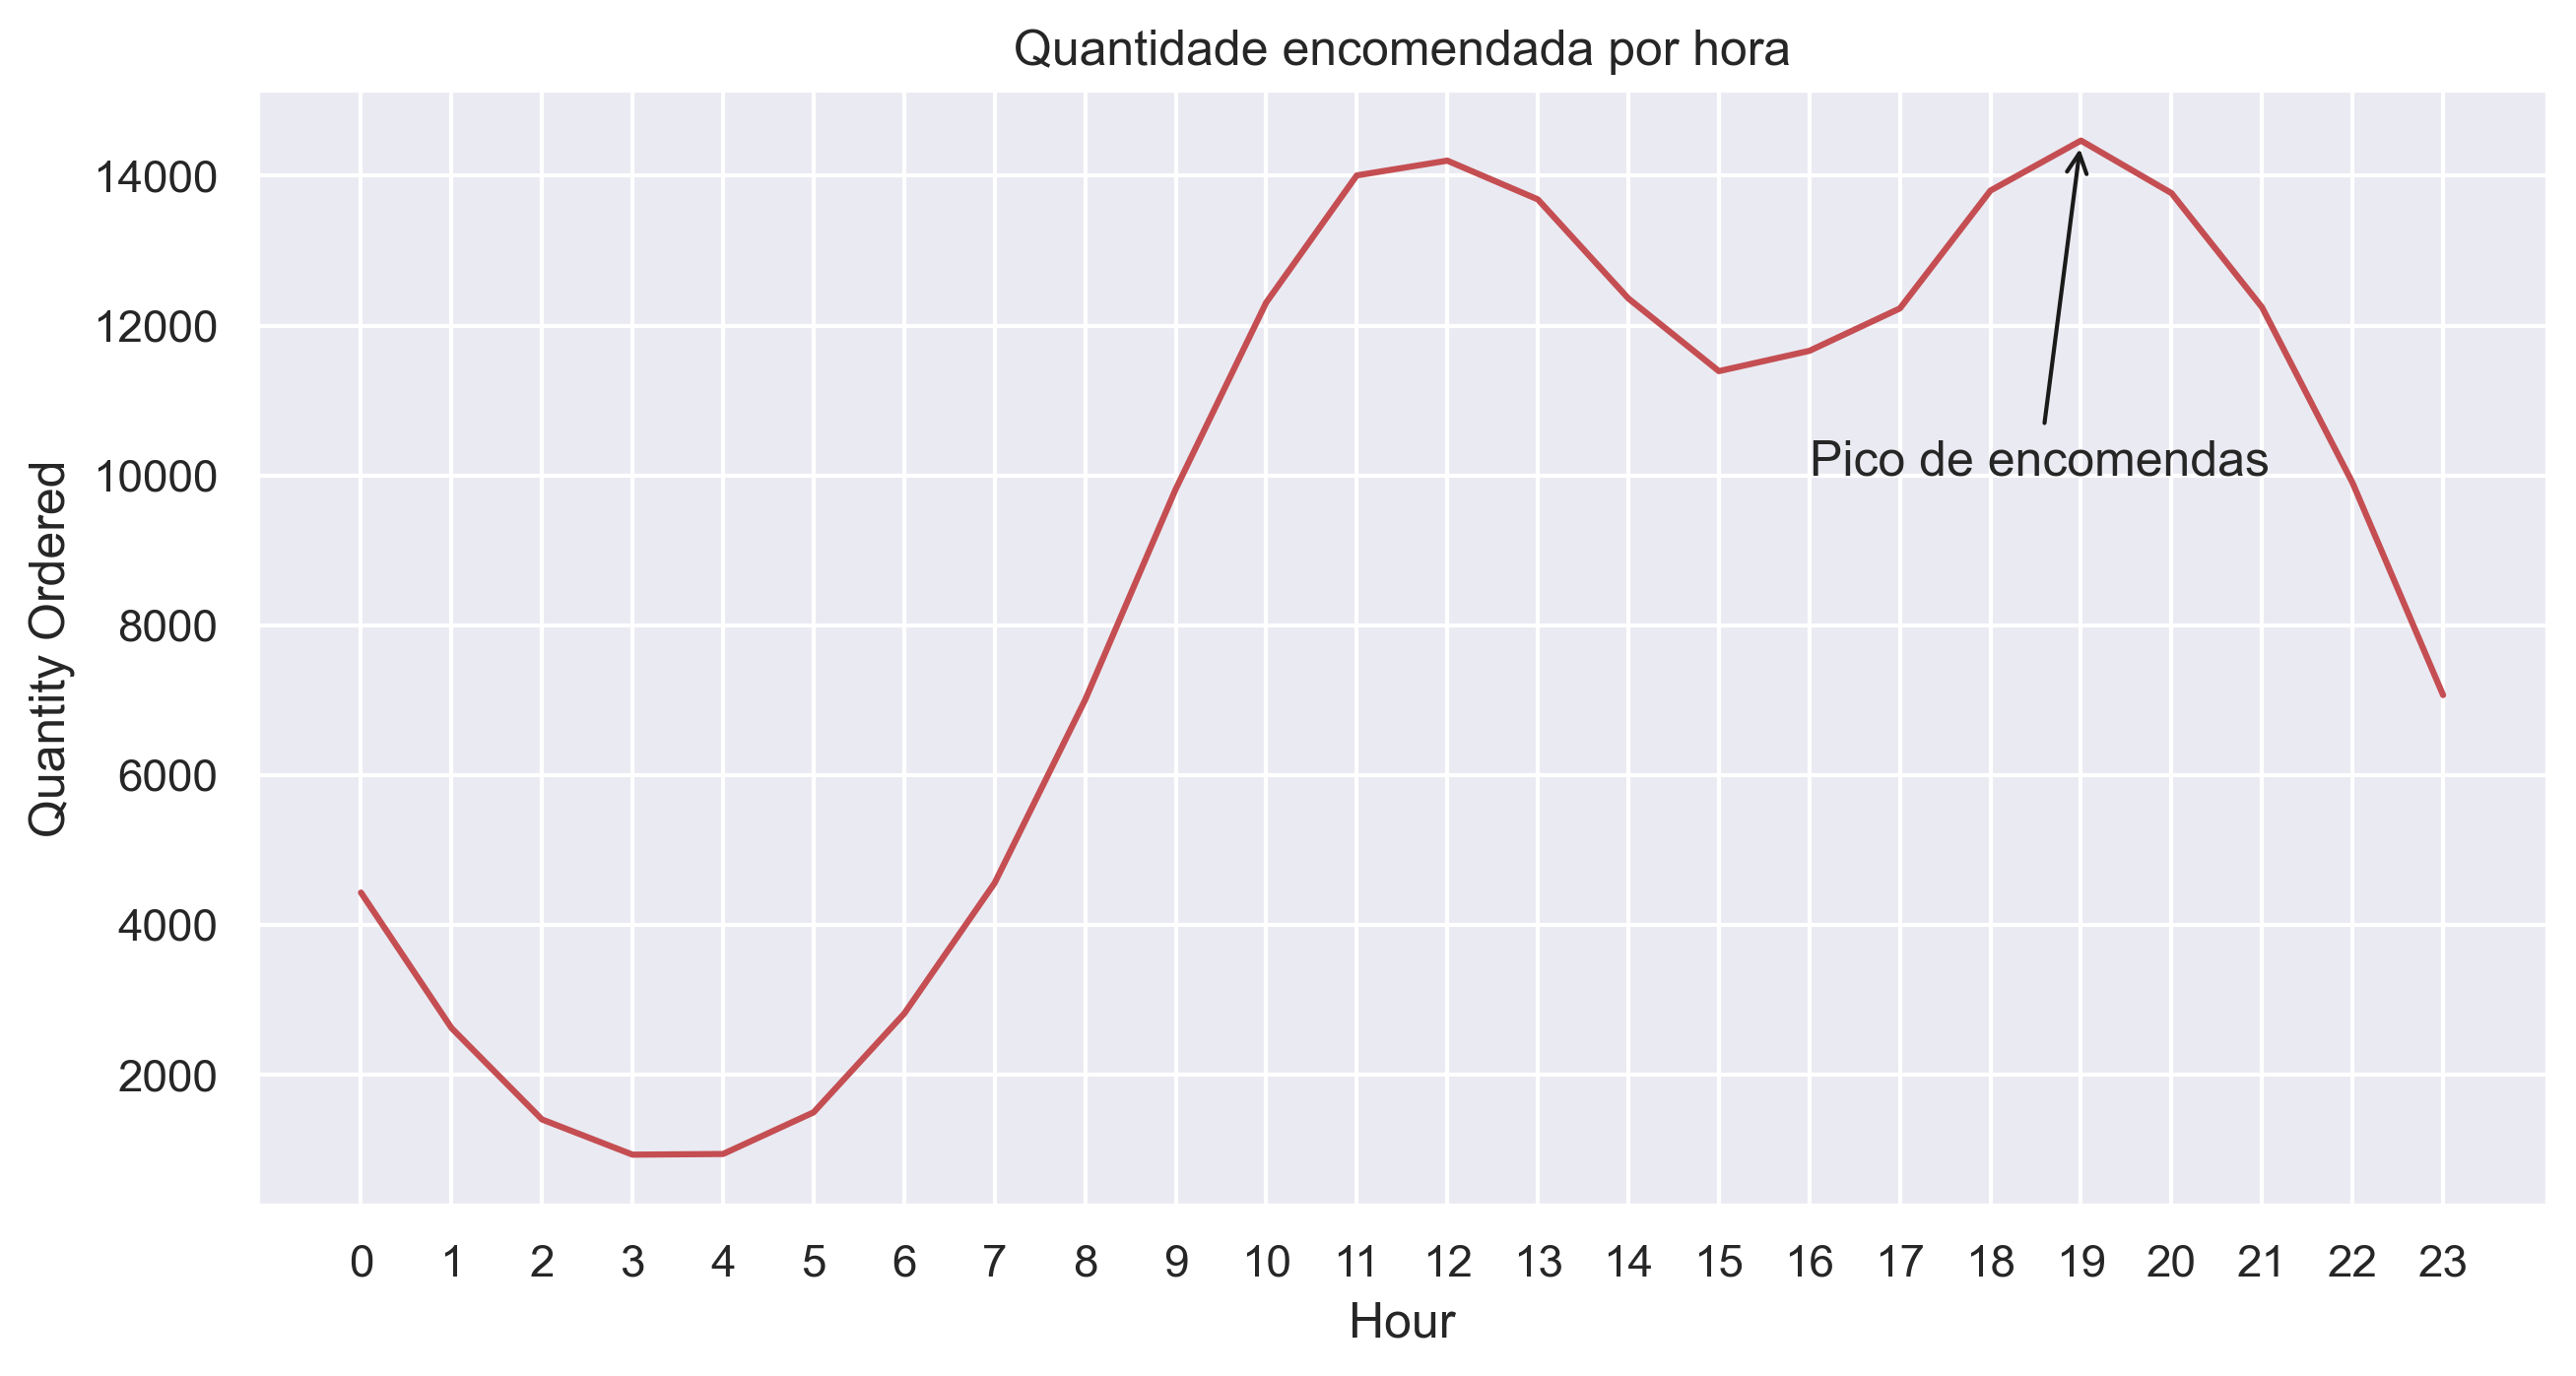

In [15]:
plt.figure(figsize=(10,5),dpi=300)
sns.set_theme()
sns.lineplot(data=horario,x='Hour',y='Quantity Ordered',color='r')
plt.title('Quantidade encomendada por hora')
plt.annotate('Pico de encomendas',xy=(19,14470),arrowprops=dict(arrowstyle='->',color='k'),xytext=(16,10000))
plt.xticks(horario.index)
plt.show()

### 4- Quais são os produtos mais vendidos em conjunto?

In [16]:
compras_2 = sales_df[sales_df['Order ID'].duplicated(keep=False)]

compras_2['Grouped'] = compras_2[['Order ID','Product']].groupby('Order ID').transform(lambda x:','.join(x))

compras_2 = compras_2[['Order ID','Grouped']].drop_duplicates()

C:\Users\Thomas\AppData\Local\Temp/ipykernel_18636/4277911992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras_2['Grouped'] = compras_2[['Order ID','Product']].groupby('Order ID').transform(lambda x:','.join(x))


In [17]:
count = Counter()

for row in compras_2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

### R: Os produtos mais vendidos simultâneamente são o Iphone e seu carregador.

### 5- Quais são os produtos mais vendidos ? E qual o motivo das vendas ?

In [18]:
vendas_produtos = sales_df[['Quantity Ordered','Product',]].groupby('Product').sum()

preços_produtos = sales_df[['Price Each','Product',]].groupby('Product').mean()
display(vendas_produtos)

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [19]:
labels = list(preços_produtos['Price Each'])

### R: O produto mais vendido é a AAA Batteries (4-pack).

### Visualização dos dados:

C:\Users\Thomas\AppData\Local\Temp/ipykernel_18636/3286803841.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(vendas_produtos.index,rotation='vertical')


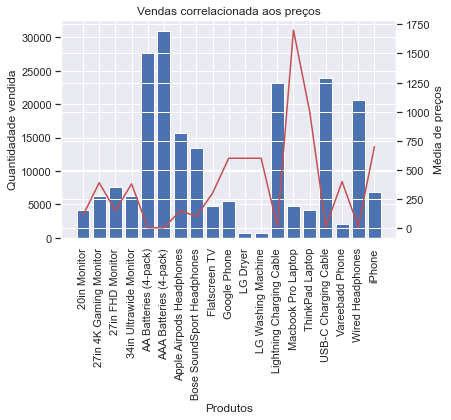

In [24]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(vendas_produtos.index,vendas_produtos['Quantity Ordered'])
ax2.plot(vendas_produtos.index,preços_produtos['Price Each'],'r')
ax1.set_xticklabels(vendas_produtos.index,rotation='vertical')
ax1.set_title('Vendas correlacionada aos preços')
ax1.set_xlabel('Produtos',fontsize=12)
ax1.set_ylabel('Quantidadade vendida',fontsize=12)
ax2.set_ylabel('Média de preços',fontsize=12)
plt.show()

### Conclusão: Através da análise do gráfico é possível identificar uma correlação entre a quantidade vendida e o preço por unidade.